In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [146]:
binary_path = '/Users/kelly/Desktop/DS5500/newdata/binary_table.csv'
binary_data = pd.read_csv(binary_path)

In [147]:
binary_data

Disease  'crowd'  'diaph'   
0                                       IVRS ou virémie        1        1  \
1                                 VIH (Primo-infection)        0        1   
2                                             Pneumonie        0        0   
3                                       IVRS ou virémie        1        0   
4                                       IVRS ou virémie        0        1   
...                                                 ...      ...      ...   
22103                                     Angine stable        0        0   
22104                           Possible NSTEMI / STEMI        0        0   
22105      Fibrillation auriculaire/Flutter auriculaire        0        0   
22106                                   Laryngite aigue        1        0   
22107  Possible influenza ou syndrome virémique typique        0        1   

       'douleurxx'  'douleurxx_carac_@_sensible'   
0                1                             1  \
1                1                             0   
2                1                             0   
3                1                             0   
4                1                             0   
...            ...                           ...   
22103            1                             0   
22104            1                             0   
22105            0                             0   
22106            1                             0   
22107            1                             1   

       'douleurxx_carac_@_une_lourdeur_ou_serrement'   
0                                                  1  \
1                                                  0   
2                                                  0   
3                                                  1   
4                                                  1   
...                                              ...   
22103                                              1   
22104                                              0   
22105                                              0   
22106                                              0   
22107                                              1   

       'douleurxx_endroitducorps_@_front'   
0                                       1  \
1                                       0   
2                                       0   
3                                       1   
4                                       0   
...                                   ...   
22103                                   0   
22104                                   0   
22105                                   0   
22106                                   0   
22107                                   1   

       'douleurxx_endroitducorps_@_joue_D_'   
0                                         1  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
22103                                     0   
22104                                     0   
22105                                     0   
22106                                     0   
22107                                     0   

       'douleurxx_endroitducorps_@_tempe_G_'  'douleurxx_intens_@_4'   
0                                          1                       1  \
1                                          1                       0   
2                                          0                       0   
3                                          1                       0   
4                                          1                       0   
...                                      ...                     ...   
22103                                      0                       1   
22104                                      0                       0   
22105                                      0                       0   

##### Dimensions of table

In [8]:
binary_data.shape

(22108, 496)

##### Unique values in disease column

In [148]:
unique_disease= binary_data['Disease'].unique()
print(unique_disease)

['IVRS ou virémie' 'VIH (Primo-infection)' 'Pneumonie'
 'Rhinosinusite chronique' 'Pharyngite virale' 'Anémie'
 'Fibrillation auriculaire/Flutter auriculaire' 'Rhinite allergique'
 'Laryngospasme' 'Céphalée en grappe' 'Anaphylaxie'
 'Pneumothorax spontané' 'OAP/Surcharge pulmonaire' 'Tuberculose'
 'Myasthénie grave' 'Attaque de panique' 'Scombroïde' 'Épiglottite'
 'Hernie inguinale' 'Syndrome de Boerhaave' 'Néoplasie du pancréas'
 'Bronchite' 'Lupus érythémateux disséminé (LED)' 'Laryngite aigue'
 'Angine instable' 'Bronchiectasies' 'Possible NSTEMI / STEMI' 'Chagas'
 'Oedème localisé ou généralisé sans atteinte pulmonaire associée'
 'Sarcoïdose' 'Fracture de côte spontanée' 'RGO'
 'Asthme exacerbé ou bronchospasme'
 'Exacerbation aigue de MPOC et/ou surinfection associée'
 'Syndrome de Guillain-Barré'
 'Possible influenza ou syndrome virémique typique' 'Embolie pulmonaire'
 'Angine stable' 'Péricardite' 'Rhinosinusite aigue' 'Coqueluche'
 'Myocardite' 'Réaction dystonique aïgue' 'néop

##### Frequency of each disease

In [149]:
disease_freq = binary_data['Disease'].value_counts()
disease_freq

Disease
IVRS ou virémie                                                    1342
Pharyngite virale                                                  1221
Anémie                                                             1047
Rhinite allergique                                                  864
Oedème localisé ou généralisé sans atteinte pulmonaire associée     610
Réaction dystonique aïgue                                           597
VIH (Primo-infection)                                               572
Anaphylaxie                                                         561
Syndrome de Guillain-Barré                                          553
Embolie pulmonaire                                                  552
Possible influenza ou syndrome virémique typique                    547
RGO                                                                 541
Otite moyenne aigue (OMA)                                           541
Pneumonie                                               

##### Frequency of all symptoms

In [150]:
symptom_counts = binary_data.drop(columns=['Disease']).sum()

symptom_counts = pd.DataFrame(symptom_counts)
symptom_counts

0
'crowd'                                              2000
'diaph'                                              2609
'douleurxx'                                         16196
'douleurxx_carac_@_sensible'                         6350
'douleurxx_carac_@_une_lourdeur_ou_serrement'        3055
...                                                   ...
'lesions_peau_endroitducorps_@_avant-bras_D_'           1
'lesions_peau_endroitducorps_@_petite_lèvre_G_'         2
'douleurxx_endroitducorps_@_arrière_de_la_chevi...      1
'douleurxx_endroitducorps_@_orteil__3__D_'              2
'douleurxx_endroitducorps_@_petit_orteil__4__G_'        2

[495 rows x 1 columns]

##### All associated symptoms per disease

In [151]:
data_symptoms = {}

for i in range(len(binary_data['Disease'])):
    disease = binary_data['Disease'][i]
    symptoms = [key for key, value in binary_data.items() if key != 'Disease' and value[i] == 1]

    if disease in data_symptoms:
        # Extend the list of symptoms and remove duplicates
        data_symptoms[disease].extend(symptoms)
        data_symptoms[disease] = list(set(data_symptoms[disease]))
    else:
        data_symptoms[disease] = symptoms

# Print the result
for disease, symptoms in data_symptoms.items():
    print(f"{disease}: {', '.join(symptoms)}")


IVRS ou virémie: 'trav1_@_N', 'douleurxx_soudain_@_5', 'douleurxx_precis_@_5', 'douleurxx_precis_@_1', 'msk_dlr', 'douleurxx_endroitducorps_@_nulle_part', 'douleurxx_intens_@_2', 'douleurxx_endroitducorps_@_joue_G_', 'dayc', 'rhino_clair', 'trav1_@_AmerN', 'douleurxx_carac_@_une_lourdeur_ou_serrement', 'douleurxx_endroitducorps_@_tempe_D_', 'douleurxx_intens_@_4', 'z77.22', 'douleurxx_carac_@_sensible', 'contact', 'douleurxx_intens_@_3', 'douleurxx_soudain_@_3', 'douleurxx_precis_@_7', 'douleurxx', 'expecto', 'douleurxx_endroitducorps_@_joue_D_', 'douleurxx_soudain_@_0', 'douleurxx_endroitducorps_@_tempe_G_', 'douleurxx_intens_@_7', 'douleurxx_intens_@_5', 'douleurxx_precis_@_3', 'gorge_dlr', 'douleurxx_soudain_@_2', 'douleurxx_intens_@_6', 'douleurxx_endroitducorps_@_occiput', 'douleurxx_endroitducorps_@_front', 'douleurxx_carac_@_NA', 'douleurxx_precis_@_6', 'toux', 'douleurxx_soudain_@_1', 'douleurxx_intens_@_8', 'crowd', 'douleurxx_soudain_@_4', 'f17.210', 'fievre', 'douleurxx_prec

In [152]:
data_symptoms

{'IVRS ou virémie': ["'trav1_@_N'",
  "'douleurxx_soudain_@_5'",
  "'douleurxx_precis_@_5'",
  "'douleurxx_precis_@_1'",
  "'msk_dlr'",
  "'douleurxx_endroitducorps_@_nulle_part'",
  "'douleurxx_intens_@_2'",
  "'douleurxx_endroitducorps_@_joue_G_'",
  "'dayc'",
  "'rhino_clair'",
  "'trav1_@_AmerN'",
  "'douleurxx_carac_@_une_lourdeur_ou_serrement'",
  "'douleurxx_endroitducorps_@_tempe_D_'",
  "'douleurxx_intens_@_4'",
  "'z77.22'",
  "'douleurxx_carac_@_sensible'",
  "'contact'",
  "'douleurxx_intens_@_3'",
  "'douleurxx_soudain_@_3'",
  "'douleurxx_precis_@_7'",
  "'douleurxx'",
  "'expecto'",
  "'douleurxx_endroitducorps_@_joue_D_'",
  "'douleurxx_soudain_@_0'",
  "'douleurxx_endroitducorps_@_tempe_G_'",
  "'douleurxx_intens_@_7'",
  "'douleurxx_intens_@_5'",
  "'douleurxx_precis_@_3'",
  "'gorge_dlr'",
  "'douleurxx_soudain_@_2'",
  "'douleurxx_intens_@_6'",
  "'douleurxx_endroitducorps_@_occiput'",
  "'douleurxx_endroitducorps_@_front'",
  "'douleurxx_carac_@_NA'",
  "'douleurxx

In [153]:
data_symptoms = pd.DataFrame.from_dict(data_symptoms, orient='index').T

In [154]:
data_symptoms

IVRS ou virémie   
0                'trav1_@_N'  \
1    'douleurxx_soudain_@_5'   
2     'douleurxx_precis_@_5'   
3     'douleurxx_precis_@_1'   
4                  'msk_dlr'   
..                       ...   
102                     None   
103                     None   
104                     None   
105                     None   
106                     None   

                                 VIH (Primo-infection)   
0    'lesions_peau_endroitducorps_@_dessus_de_la_la...  \
1                            'lesions_peau_elevee_@_3'   
2      'lesions_peau_endroitducorps_@_grande_lèvre_D_'   
3                               'douleurxx_intens_@_4'   
4    'lesions_peau_endroitducorps_@_gencive_inférie...   
..                                                 ...   
102                                               None   
103                                               None   
104                                               None   
105                                               None   
106                                               None   

                                             Pneumonie   
0    'lesions_peau_endroitducorps_@_thorax_postérie...  \
1                            'lesions_peau_prurit_@_4'   
2                                           'ww_respi'   
3                            'lesions_peau_elevee_@_3'   
4                                        'rhino_clair'   
..                                                 ...   
102           'lesions_peau_endroitducorps_@_flanc_D_'   
103             'douleurxx_carac_@_un_coup_de_couteau'   
104                             'douleurxx_precis_@_2'   
105         'douleurxx_endroitducorps_@_bas_du_thorax'   
106                             'douleurxx_precis_@_6'   

                 Rhinosinusite chronique   
0                            'trav1_@_N'  \
1                 'douleurxx_precis_@_5'   
2                              'hyponos'   
3    'douleurxx_endroitducorps_@_bouche'   
4    'douleurxx_irrad_@_arrière_de_tête'   
..                                   ...   
102                                 None   
103                                 None   
104                                 None   
105                                 None   
106                                 None   

                            Pharyngite virale                   Anémie   
0                                 'trav1_@_N'              'trav1_@_N'  \
1                     'douleurxx_soudain_@_5'  'douleurxx_soudain_@_5'   
2                      'douleurxx_precis_@_5'   'douleurxx_precis_@_5'   
3    'douleurxx_endroitducorps_@_amygdale_D_'                 'melena'   
4                                    'z92.25'                  'preg1'   
..                                        ...                      ...   
102                                      None                     None   
103                                      None                     None   
104                                      None                     None   
105                                      None                     None   
106                                      None                     None   

    Fibrillation auriculaire/Flutter auriculaire Rhinite allergique   
0                                    'trav1_@_N'        'trav1_@_N'  \
1                                          'e66'              'j45'   
2                                         'bode'             'toux'   
3                                        'i25.1'    'trav1_@_AmerN'   
4                               'etourdissement'      'rhino_clair'   
..                                           ...                ...   
102                                         None               None   
103                                         None               None   
104                                         None               None   
105                                         None               None   
106                                

In [155]:
unique_val = data_symptoms['IVRS ou virémie'].unique()
unique_val

array(["'trav1_@_N'", "'douleurxx_soudain_@_5'", "'douleurxx_precis_@_5'",
       "'douleurxx_precis_@_1'", "'msk_dlr'",
       "'douleurxx_endroitducorps_@_nulle_part'",
       "'douleurxx_intens_@_2'", "'douleurxx_endroitducorps_@_joue_G_'",
       "'dayc'", "'rhino_clair'", "'trav1_@_AmerN'",
       "'douleurxx_carac_@_une_lourdeur_ou_serrement'",
       "'douleurxx_endroitducorps_@_tempe_D_'", "'douleurxx_intens_@_4'",
       "'z77.22'", "'douleurxx_carac_@_sensible'", "'contact'",
       "'douleurxx_intens_@_3'", "'douleurxx_soudain_@_3'",
       "'douleurxx_precis_@_7'", "'douleurxx'", "'expecto'",
       "'douleurxx_endroitducorps_@_joue_D_'", "'douleurxx_soudain_@_0'",
       "'douleurxx_endroitducorps_@_tempe_G_'", "'douleurxx_intens_@_7'",
       "'douleurxx_intens_@_5'", "'douleurxx_precis_@_3'", "'gorge_dlr'",
       "'douleurxx_soudain_@_2'", "'douleurxx_intens_@_6'",
       "'douleurxx_endroitducorps_@_occiput'",
       "'douleurxx_endroitducorps_@_front'", "'douleurxx_ca

##### Common symptoms across diseases

In [156]:
from collections import Counter
common_symptoms = [symptom for symptom, count in Counter(data_symptoms.values.flatten()).items() if count > 1]
common_symptoms = sorted(common_symptoms, key=lambda x: -Counter(data_symptoms.values.flatten())[x])
common_symptoms = pd.DataFrame(common_symptoms)
common_symptoms = common_symptoms.drop(0)
common_symptoms

0
1                                          'trav1_@_N'
2                                      'trav1_@_AmerN'
3                                          'douleurxx'
4                                              'dyspn'
5                               'douleurxx_precis_@_6'
..                                                 ...
276              'douleurxx_endroitducorps_@_genou_D_'
277     'lesions_peau_endroitducorps_@_côté_du_cou_D_'
278  'douleurxx_endroitducorps_@_face_palmaire_du_p...
279                          'lesions_peau_prurit_@_5'
280                                             'move'

[280 rows x 1 columns]

##### Top 20 most common 

In [163]:
top_20 = common_symptoms[:20]
top_20 = pd.DataFrame(top_20)
top_20

0
1                      'trav1_@_N'
2                  'trav1_@_AmerN'
3                      'douleurxx'
4                          'dyspn'
5           'douleurxx_precis_@_6'
6           'douleurxx_precis_@_5'
7           'douleurxx_intens_@_6'
8          'douleurxx_soudain_@_5'
9           'douleurxx_precis_@_7'
10          'douleurxx_intens_@_5'
11          'douleurxx_intens_@_7'
12          'douleurxx_intens_@_4'
13         'douleurxx_soudain_@_3'
14          'douleurxx_precis_@_4'
15         'douleurxx_soudain_@_4'
16  'douleurxx_irrad_@_nulle_part'
17          'douleurxx_precis_@_3'
18          'douleurxx_precis_@_2'
19          'douleurxx_intens_@_3'
20          'douleurxx_intens_@_8'

### Word Cloud

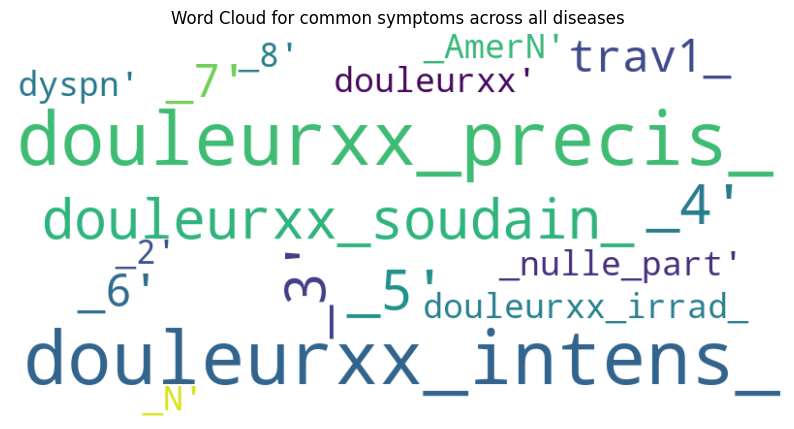

In [165]:
from wordcloud import WordCloud
specific_symptoms = top_20[0].tolist()
specific_symptoms_text = ' '.join(specific_symptoms)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(specific_symptoms_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for common symptoms across all diseases')
plt.show()

##### Correlation heatmap for common symptoms across all diseases

In [166]:
corr_matrix = symp_specific.corr()
corr_matrix

'trav1_@_N'  'trav1_@_AmerN'   
'trav1_@_N'                                        1.000000        -0.800605  \
'trav1_@_AmerN'                                   -0.800605         1.000000   
'douleurxx'                                       -0.083257         0.041385   
'dyspn'                                           -0.078112         0.048177   
'douleurxx_precis_@_6'                            -0.008354        -0.008384   
'douleurxx_precis_@_5'                            -0.017676         0.000469   
'douleurxx_intens_@_6'                             0.020667         0.003252   
'douleurxx_soudain_@_5'                           -0.009663        -0.012792   
'douleurxx_precis_@_7'                            -0.023825         0.014981   
'douleurxx_intens_@_5'                            -0.016624        -0.005443   
'douleurxx_intens_@_7'                             0.024226         0.000201   
'douleurxx_intens_@_4'                            -0.022033        -0.010704   
'douleurxx_soudain_@_3'                           -0.015059        -0.001748   
'douleurxx_precis_@_4'                            -0.011654        -0.000997   
'douleurxx_soudain_@_4'                           -0.017026        -0.003176   
'douleurxx_irrad_@_nulle_part'                    -0.010845        -0.086807   
'douleurxx_precis_@_3'                            -0.025739         0.015155   
'douleurxx_precis_@_2'                            -0.032617         0.009566   
'douleurxx_intens_@_3'                            -0.049696         0.020185   
'douleurxx_intens_@_8'                             0.021186         0.001862   
'douleurxx_precis_@_8'                            -0.015525         0.000093   
'douleurxx_soudain_@_2'                           -0.012790        -0.004724   
'douleurxx_soudain_@_6'                            0.001263         0.013876   
'douleurxx_intens_@_2'                            -0.054336         0.012644   
'douleurxx_soudain_@_0'                           -0.040445         0.020496   
'douleurxx_soudain_@_1'                           -0.039084         0.003187   
'toux'                                             0.107120        -0.057226   
'f17.210'                                          0.103672        -0.058513   
'douleurxx_carac_@_sensible'                      -0.091597         0.038354   
'douleurxx_soudain_@_7'                            0.007775         0.016413   
'douleurxx_carac_@_vive'                          -0.042397         0.100026   
'douleurxx_soudain_@_8'                            0.007948         0.014260   
'douleurxx_intens_@_9'                             0.011411         0.011872   
'fievre'                                           0.054683        -0.034635   
'douleurxx_endroitducorps_@_haut_du_thorax'        0.041617        -0.010126   
'douleurxx_endroitducorps_@_bas_du_thorax'         0.063077        -0.033210   
'douleurxx_carac_@_un_coup_de_couteau'            -0.064751         0.126917   
'douleurxx_precis_@_0'                             0.018903        -0.011222   
'douleurxx_endroitducorps_@_épigastre'             0.049722        -0.023223   
'rhino_clair'                                      0.090166        -0.051590   
'douleurxx_precis_@_1'                             0.024586        -0.008613   
'douleurxx_endroitducorps_@_sein_G_'               0.016701         0.018716   
'douleurxx_endroitducorps_@_sein_D_'              -0.014197         0.057902   
'douleurxx_endroitducorps_@_nulle_part'            0.003738        -0.003436   
'douleurxx_intens_@_0'                             0.003738        -0.003436   
'douleurxx_carac_@_NA'                             0.003738        -0.003436   
'douleurxx_endroitducorps_@_côté_du_thorax_D_'    -0.085802         0.144720   
'douleurxx_soudain_@_9'                            0.000875         0.019357   
'douleurxx_precis_@_9'                            -0.009098         0.031000   
'douleurxx_endroitducorps_@_côté_du_thorax_G_'  

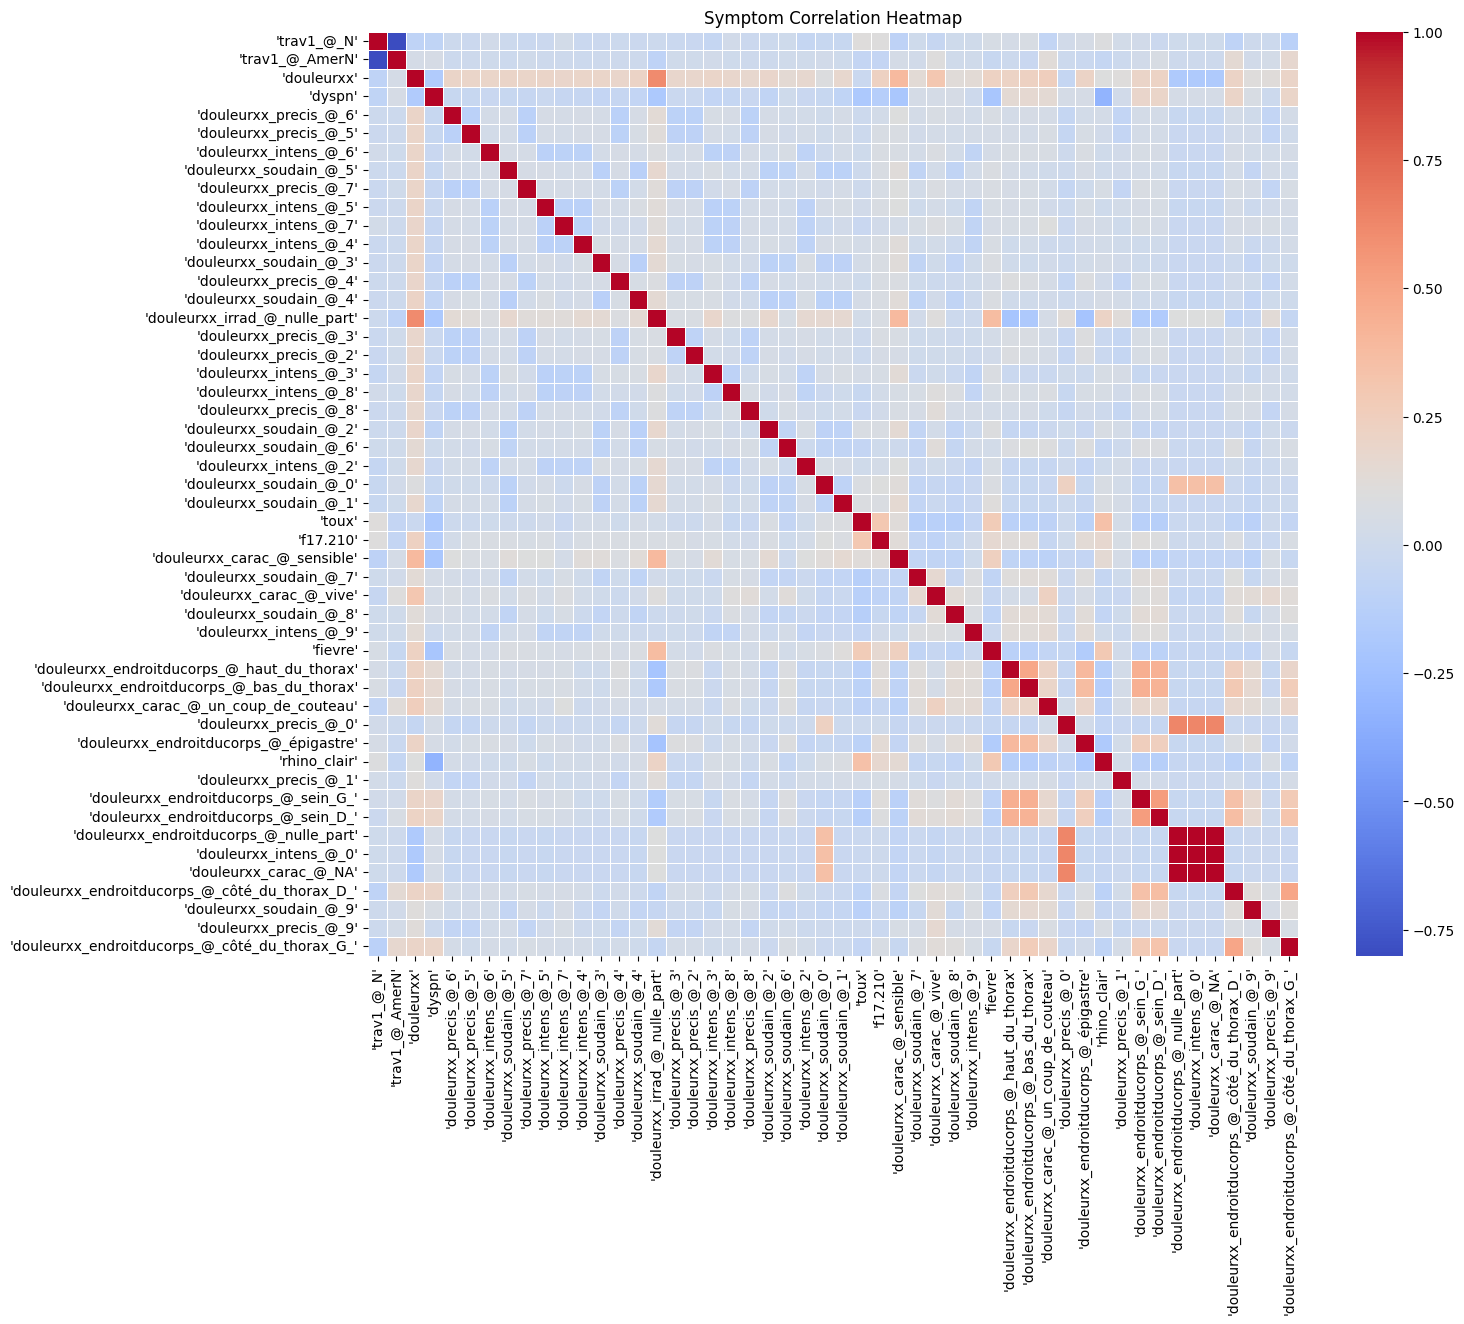

In [167]:
# Filter to only include patient entries that include 
specific_symptoms = top_20[0].tolist()
symp_specific = binary_data[specific_symptoms]
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Symptom Correlation Heatmap')
plt.show()

## Processed data

In [29]:
df_path = '/Users/kelly/Desktop/DS5500/newdata/processed_train.csv'
df = pd.read_csv(df_path, low_memory=False)

In [60]:
pd.set_option('display.max_columns', None)

In [61]:
df

Unnamed: 0  AGE SEX                PATHOLOGY   
0                 0   18   M                     URTI  \
1                 1   21   M  HIV (initial infection)   
2                 2   19   F                Pneumonia   
3                 3   34   F                     URTI   
4                 4   36   M                     URTI   
...             ...  ...  ..                      ...   
1025597     1025597   18   M             Epiglottitis   
1025598     1025598   28   F             Epiglottitis   
1025599     1025599    0   F             Epiglottitis   
1025600     1025600   26   F             Epiglottitis   
1025601     1025601   25   F             Epiglottitis   

         Do you live with 4 or more people?   
0                                       1.0  \
1                                       0.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   
...                                     ...   
1025597                                 0.0   
1025598                                 0.0   
1025599                                 0.0   
1025600                                 0.0   
1025601                                 0.0   

         Have you had significantly increased sweating?   
0                                                   1.0  \
1                                                   1.0   
2                                                   0.0   
3                                                   0.0   
4                                                   1.0   
...                                                 ...   
1025597                                             0.0   
1025598                                             0.0   
1025599                                             0.0   
1025600                                             0.0   
1025601                                             0.0   

         Do you have pain somewhere, related to your reason for consulting?   
0                                                      1.0                   \
1                                                      1.0                    
2                                                      1.0                    
3                                                      1.0                    
4                                                      1.0                    
...                                                    ...                    
1025597                                                1.0                    
1025598                                                1.0                    
1025599                                                1.0                    
1025600                                                1.0                    
1025601                                                1.0                    

        Characterize your pain: Do you feel pain somewhere?   
0                         heavy                   temple(L)  \
1                    exhausting                   temple(L)   
2                         sharp     posterior chest wall(L)   
3                         heavy                   temple(L)   
4                         heavy                   temple(L)   
...                         ...                         ...   
1025597                   sharp                     pharynx   
1025598                   sharp                     pharynx   
1025599                   sharp                     pharynx   
1025600                   sharp                     pharynx   
1025601          a knife stroke                     trachea   

        Does the pain radiate to another location?   
0                                          nowhere  \
1                                          nowhere   
2                                          nowhere   
3                                          nowhere   
4                                          nowhere   
...                 

In [9]:
len(df)

1025602

##### Unique diseases

In [15]:
#df['PATHOLOGY'].unique()
#print(df['PATHOLOGY'].unique())
Pathology = pd.DataFrame(df['PATHOLOGY'].unique())
Pathology

0
0                                       URTI
1                    HIV (initial infection)
2                                  Pneumonia
3                     Chronic rhinosinusitis
4                          Viral pharyngitis
5                                     Anemia
6                        Atrial fibrillation
7                         Allergic sinusitis
8                                Larygospasm
9                           Cluster headache
10                               Anaphylaxis
11                  Spontaneous pneumothorax
12                     Acute pulmonary edema
13                              Tuberculosis
14                         Myasthenia gravis
15                              Panic attack
16                  Scombroid food poisoning
17                              Epiglottitis
18                           Inguinal hernia
19                                 Boerhaave
20                       Pancreatic neoplasm
21                                Bronchitis
22                                       SLE
23                          Acute laryngitis
24                           Unstable angina
25                            Bronchiectasis
26                   Possible NSTEMI / STEMI
27                                    Chagas
28                           Localized edema
29                               Sarcoidosis
30                  Spontaneous rib fracture
31                                      GERD
32  Bronchospasm / acute asthma exacerbation
33       Acute COPD exacerbation / infection
34                   Guillain-Barré syndrome
35                                 Influenza
36                        Pulmonary embolism
37                             Stable angina
38                              Pericarditis
39                      Acute rhinosinusitis
40                            Whooping cough
41                               Myocarditis
42                  Acute dystonic reactions
43                        Pulmonary neoplasm
44                        Acute otitis media
45                                      PSVT
46                                     Croup
47                                     Ebola
48                             Bronchiolitis

In [14]:
len(Pathology)

49

##### Most frequent disease

In [133]:
disease_counts = df['PATHOLOGY'].value_counts().sort_values(ascending=False)
disease_counts

PATHOLOGY
URTI                                        64368
Viral pharyngitis                           61642
Anemia                                      50665
HIV (initial infection)                     29013
Localized edema                             27825
Anaphylaxis                                 27718
Pulmonary embolism                          27468
Influenza                                   26812
Bronchitis                                  26400
Allergic sinusitis                          26203
Acute dystonic reactions                    25982
GERD                                        25979
Acute otitis media                          25917
Pneumonia                                   25761
Panic attack                                25019
Acute laryngitis                            24129
Guillain-Barré syndrome                     22867
Pericarditis                                22785
Sarcoidosis                                 21285
Possible NSTEMI / STEMI                 

##### World cloud

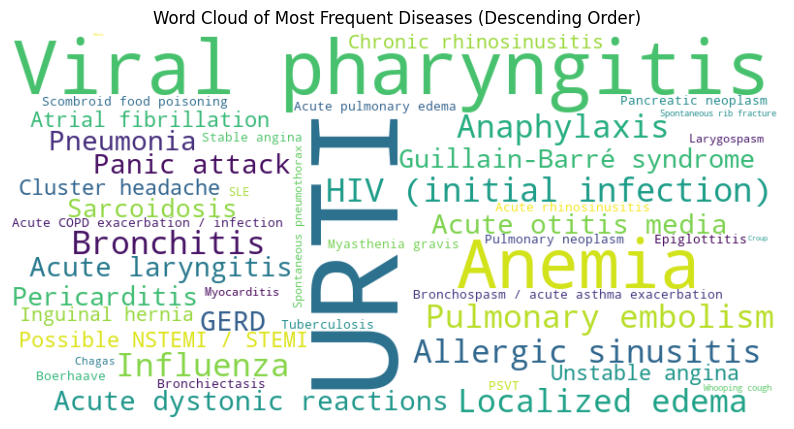

In [140]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disease_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Diseases")
plt.show()

##### Occurrence of diseases by gender

In [14]:
gender_disease_counts = df.groupby(['SEX', 'PATHOLOGY']).size().reset_index(name='count')
gender_disease_counts

SEX                            PATHOLOGY  count
0    F  Acute COPD exacerbation / infection   7549
1    F             Acute dystonic reactions  13339
2    F                     Acute laryngitis  12423
3    F                   Acute otitis media  13353
4    F                Acute pulmonary edema   9819
..  ..                                  ...    ...
93   M                         Tuberculosis   7930
94   M                                 URTI  31239
95   M                      Unstable angina  10412
96   M                    Viral pharyngitis  29871
97   M                       Whooping cough   2979

[98 rows x 3 columns]

##### Most common disease for each gender

##### Female disease count

In [18]:
female_disease_counts = gender_disease_counts[gender_disease_counts['SEX'] == 'F']
female_disease_counts = female_disease_counts.sort_values(by='count', ascending=False)
female_disease_counts

SEX                                 PATHOLOGY  count
45   F                                      URTI  33129
47   F                         Viral pharyngitis  31771
8    F                                    Anemia  26194
23   F                   HIV (initial infection)  14983
27   F                           Localized edema  14367
7    F                               Anaphylaxis  14246
36   F                        Pulmonary embolism  14173
24   F                                 Influenza  13748
13   F                                Bronchitis  13694
21   F                                      GERD  13467
6    F                        Allergic sinusitis  13383
3    F                        Acute otitis media  13353
1    F                  Acute dystonic reactions  13339
34   F                                 Pneumonia  13252
32   F                              Panic attack  12902
2    F                          Acute laryngitis  12423
33   F                              Pericarditis  11785
22   F                   Guillain-Barré syndrome  11683
39   F                               Sarcoidosis  11516
35   F                   Possible NSTEMI / STEMI  10916
17   F                          Cluster headache  10866
46   F                           Unstable angina  10832
25   F                           Inguinal hernia  10785
9    F                       Atrial fibrillation  10758
16   F                    Chronic rhinosinusitis  10529
14   F  Bronchospasm / acute asthma exacerbation  10309
4    F                     Acute pulmonary edema   9819
31   F                       Pancreatic neoplasm   9770
11   F                            Bronchiectasis   9644
28   F                         Myasthenia gravis   9607
40   F                  Scombroid food poisoning   9578
30   F                                      PSVT   9535
43   F                             Stable angina   8997
20   F                              Epiglottitis   8896
44   F                              Tuberculosis   8315
0    F       Acute COPD exacerbation / infection   7549
10   F                                 Boerhaave   7547
37   F                        Pulmonary neoplasm   7372
5    F                      Acute rhinosinusitis   7156
38   F                                       SLE   6018
29   F                               Myocarditis   5733
26   F                               Larygospasm   5654
41   F                  Spontaneous pneumothorax   5241
15   F                                    Chagas   4960
48   F                            Whooping cough   3091
42   F                  Spontaneous rib fracture   2927
18   F                                     Croup   1504
19   F                                     Ebola    344
12   F                             Bronchiolitis    138

##### Male disease count

In [19]:
male_disease_counts = gender_disease_counts[gender_disease_counts['SEX'] == 'M']
male_disease_counts = male_disease_counts.sort_values(by='count', ascending=False)
male_disease_counts

SEX                                 PATHOLOGY  count
94   M                                      URTI  31239
96   M                         Viral pharyngitis  29871
57   M                                    Anemia  24471
72   M                   HIV (initial infection)  14030
56   M                               Anaphylaxis  13472
76   M                           Localized edema  13458
85   M                        Pulmonary embolism  13295
73   M                                 Influenza  13064
55   M                        Allergic sinusitis  12820
62   M                                Bronchitis  12706
50   M                  Acute dystonic reactions  12643
52   M                        Acute otitis media  12564
70   M                                      GERD  12512
83   M                                 Pneumonia  12509
81   M                              Panic attack  12117
51   M                          Acute laryngitis  11706
71   M                   Guillain-Barré syndrome  11184
82   M                              Pericarditis  11000
95   M                           Unstable angina  10412
84   M                   Possible NSTEMI / STEMI  10344
58   M                       Atrial fibrillation  10278
49   M       Acute COPD exacerbation / infection  10112
65   M                    Chronic rhinosinusitis  10050
66   M                          Cluster headache   9938
88   M                               Sarcoidosis   9769
63   M  Bronchospasm / acute asthma exacerbation   9566
74   M                           Inguinal hernia   9450
79   M                                      PSVT   9246
53   M                     Acute pulmonary edema   9199
60   M                            Bronchiectasis   9151
80   M                       Pancreatic neoplasm   9076
77   M                         Myasthenia gravis   8959
89   M                  Scombroid food poisoning   8957
69   M                              Epiglottitis   8313
92   M                             Stable angina   7998
93   M                              Tuberculosis   7930
59   M                                 Boerhaave   7533
86   M                        Pulmonary neoplasm   7085
54   M                      Acute rhinosinusitis   6422
87   M                                       SLE   5849
75   M                               Larygospasm   5344
78   M                               Myocarditis   5340
90   M                  Spontaneous pneumothorax   4921
64   M                                    Chagas   4292
97   M                            Whooping cough   2979
91   M                  Spontaneous rib fracture   2785
67   M                                     Croup   1348
68   M                                     Ebola    374
61   M                             Bronchiolitis    123

In [19]:
most_common_disease = gender_disease_counts.loc[gender_disease_counts.groupby('SEX')['count'].idxmax()]
most_common_disease

SEX PATHOLOGY  count
45   F      URTI  33129
94   M      URTI  31239

##### Top 5 most common disease by gender

In [21]:
most_common_diseases = gender_disease_counts.groupby('SEX').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
most_common_diseases

SEX                PATHOLOGY  count
0   F                     URTI  33129
1   F        Viral pharyngitis  31771
2   F                   Anemia  26194
3   F  HIV (initial infection)  14983
4   F          Localized edema  14367
5   M                     URTI  31239
6   M        Viral pharyngitis  29871
7   M                   Anemia  24471
8   M  HIV (initial infection)  14030
9   M              Anaphylaxis  13472

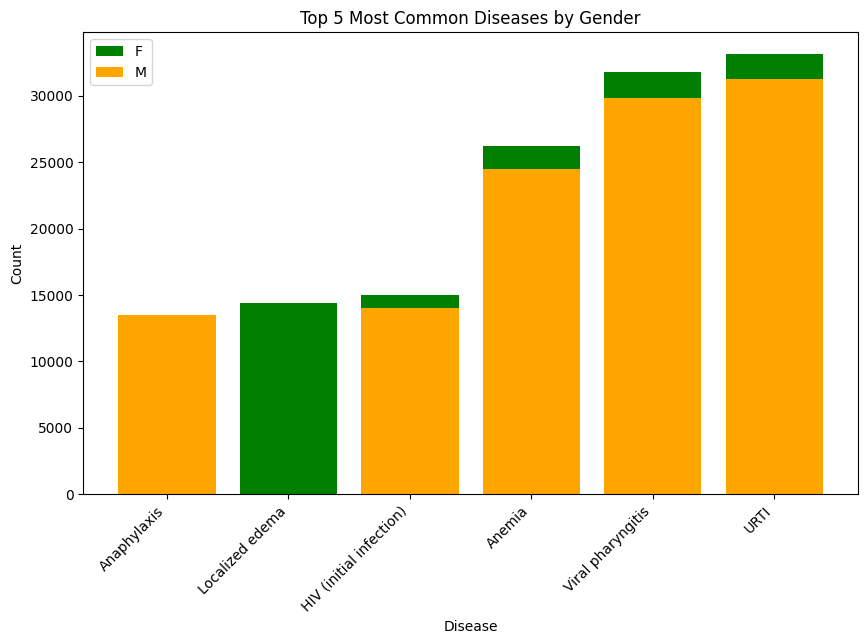

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['green', 'orange']
for i, (gender, data) in enumerate(most_common_diseases.groupby('SEX')):
    ax.bar(data['PATHOLOGY'], data['count'], label=gender, color=colors[i])

ax.set_xlabel('Disease')
ax.set_ylabel('Count')
ax.set_title('Top 5 Most Common Diseases by Gender')
ax.invert_xaxis()
ax.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

##### Disease per age group 

In [32]:
Age = pd.DataFrame(df['AGE'].unique())
Age

0
0    18
1    21
2    19
3    34
4    36
..   ..
105  92
106  86
107  91
108  93
109  96

[110 rows x 1 columns]

In [34]:
smallest_age = Age.min().iloc[0]
smallest_age

0

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [36]:
biggest_age = Age.max().iloc[0]
biggest_age

109

##### Age groups

In [41]:
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,  60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
age_labels = ['0-5','5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55','55-60','60-65','65-70','70-75','75-80','80-85', '85-90','90-95','95-100','100-105','105+']

In [42]:
df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

In [43]:
df

Unnamed: 0  AGE SEX                PATHOLOGY   
0                 0   18   M                     URTI  \
1                 1   21   M  HIV (initial infection)   
2                 2   19   F                Pneumonia   
3                 3   34   F                     URTI   
4                 4   36   M                     URTI   
...             ...  ...  ..                      ...   
1025597     1025597   18   M             Epiglottitis   
1025598     1025598   28   F             Epiglottitis   
1025599     1025599    0   F             Epiglottitis   
1025600     1025600   26   F             Epiglottitis   
1025601     1025601   25   F             Epiglottitis   

         Do you live with 4 or more people?   
0                                       1.0  \
1                                       0.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   
...                                     ...   
1025597                                 0.0   
1025598                                 0.0   
1025599                                 0.0   
1025600                                 0.0   
1025601                                 0.0   

         Have you had significantly increased sweating?   
0                                                   1.0  \
1                                                   1.0   
2                                                   0.0   
3                                                   0.0   
4                                                   1.0   
...                                                 ...   
1025597                                             0.0   
1025598                                             0.0   
1025599                                             0.0   
1025600                                             0.0   
1025601                                             0.0   

         Do you have pain somewhere, related to your reason for consulting?   
0                                                      1.0                   \
1                                                      1.0                    
2                                                      1.0                    
3                                                      1.0                    
4                                                      1.0                    
...                                                    ...                    
1025597                                                1.0                    
1025598                                                1.0                    
1025599                                                1.0                    
1025600                                                1.0                    
1025601                                                1.0                    

        Characterize your pain: Do you feel pain somewhere?   
0                         heavy                   temple(L)  \
1                    exhausting                   temple(L)   
2                         sharp     posterior chest wall(L)   
3                         heavy                   temple(L)   
4                         heavy                   temple(L)   
...                         ...                         ...   
1025597                   sharp                     pharynx   
1025598                   sharp                     pharynx   
1025599                   sharp                     pharynx   
1025600                   sharp                     pharynx   
1025601          a knife stroke                     trachea   

        Does the pain radiate to another location?  ...   
0                                          nowhere  ...  \
1                                          nowhere  ...   
2                                          nowhere  ...   
3                                          nowhere  ...   
4                                          nowher

##### Most common disease across age groups 

In [47]:
most_common_disease_by_age_group = df.groupby('age_group')['PATHOLOGY'].apply(lambda x: x.value_counts().idxmax()).reset_index()

In [48]:
most_common_disease_by_age_group

age_group          PATHOLOGY
0        0-5               URTI
1       5-10               URTI
2      10-15  Viral pharyngitis
3      15-20  Viral pharyngitis
4      20-25  Viral pharyngitis
5      25-30  Viral pharyngitis
6      30-35               URTI
7      35-40  Viral pharyngitis
8      40-45  Viral pharyngitis
9      45-50               URTI
10     50-55               URTI
11     55-60               URTI
12     60-65               URTI
13     65-70  Viral pharyngitis
14     70-75               URTI
15     75-80               URTI
16     80-85               URTI
17     85-90  Viral pharyngitis
18     90-95  Viral pharyngitis
19    95-100  Viral pharyngitis
20   100-105               URTI
21      105+               URTI

##### 3 most common diseases per age group

In [49]:
# Group data by age group

top_3_diseases_age_group = df.groupby('age_group')['PATHOLOGY'].value_counts().groupby(level=0, group_keys=False).nlargest(3).reset_index(name='count')
top_3_diseases_age_group

age_group          PATHOLOGY  count
0        0-5               URTI   4680
1        0-5             Anemia   3617
2        0-5    Localized edema   2105
3       5-10               URTI   3680
4       5-10  Viral pharyngitis   3426
..       ...                ...    ...
61   100-105  Viral pharyngitis    233
62   100-105             Anemia    210
63      105+               URTI    282
64      105+  Viral pharyngitis    257
65      105+             Anemia    220

[66 rows x 3 columns]

In [56]:
pivot_table = top_3_diseases_age_group.pivot(index='PATHOLOGY', columns='age_group', values='count').fillna(0)
pivot_table = pivot_table[age_labels]
pivot_table

age_group             0-5    5-10   10-15   15-20   20-25   25-30   30-35   
PATHOLOGY                                                                   
Anemia             3617.0  2878.0  2875.0  3280.0  3788.0  3929.0  3583.0  \
Localized edema    2105.0     0.0     0.0     0.0     0.0     0.0     0.0   
URTI               4680.0  3680.0  3760.0  4131.0  4783.0  5080.0  4677.0   
Viral pharyngitis     0.0  3426.0  3770.0  4142.0  5055.0  5184.0  4667.0   

age_group           35-40   40-45   45-50  ...   60-65   65-70   70-75   
PATHOLOGY                                  ...                           
Anemia             3264.0  3269.0  3365.0  ...  2836.0  2274.0  1639.0  \
Localized edema       0.0     0.0     0.0  ...     0.0     0.0     0.0   
URTI               4092.0  4143.0  4282.0  ...  3522.0  2886.0  2051.0   
Viral pharyngitis  4265.0  4202.0  4245.0  ...  3511.0  2994.0  1990.0   

age_group           75-80   80-85  85-90  90-95  95-100  100-105   105+  
PATHOLOGY                                                                
Anemia             1250.0   819.0  224.0  205.0   207.0    210.0  220.0  
Localized edema       0.0     0.0    0.0    0.0     0.0      0.0    0.0  
URTI               1574.0  1005.0  235.0  250.0   249.0    239.0  282.0  
Viral pharyngitis  1545.0   967.0  277.0  268.0   257.0    233.0  257.0  

[4 rows x 22 columns]

##### Correlation heatmap

###### check for frequency of each symptom/question

In [72]:
#df

Unnamed: 0  AGE SEX                PATHOLOGY   
0                 0   18   M                     URTI  \
1                 1   21   M  HIV (initial infection)   
2                 2   19   F                Pneumonia   
3                 3   34   F                     URTI   
4                 4   36   M                     URTI   
...             ...  ...  ..                      ...   
1025597     1025597   18   M             Epiglottitis   
1025598     1025598   28   F             Epiglottitis   
1025599     1025599    0   F             Epiglottitis   
1025600     1025600   26   F             Epiglottitis   
1025601     1025601   25   F             Epiglottitis   

         Do you live with 4 or more people?   
0                                       1.0  \
1                                       0.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   
...                                     ...   
1025597                                 0.0   
1025598                                 0.0   
1025599                                 0.0   
1025600                                 0.0   
1025601                                 0.0   

         Have you had significantly increased sweating?   
0                                                   1.0  \
1                                                   1.0   
2                                                   0.0   
3                                                   0.0   
4                                                   1.0   
...                                                 ...   
1025597                                             0.0   
1025598                                             0.0   
1025599                                             0.0   
1025600                                             0.0   
1025601                                             0.0   

         Do you have pain somewhere, related to your reason for consulting?   
0                                                      1.0                   \
1                                                      1.0                    
2                                                      1.0                    
3                                                      1.0                    
4                                                      1.0                    
...                                                    ...                    
1025597                                                1.0                    
1025598                                                1.0                    
1025599                                                1.0                    
1025600                                                1.0                    
1025601                                                1.0                    

        Characterize your pain: Do you feel pain somewhere?   
0                         heavy                   temple(L)  \
1                    exhausting                   temple(L)   
2                         sharp     posterior chest wall(L)   
3                         heavy                   temple(L)   
4                         heavy                   temple(L)   
...                         ...                         ...   
1025597                   sharp                     pharynx   
1025598                   sharp                     pharynx   
1025599                   sharp                     pharynx   
1025600                   sharp                     pharynx   
1025601          a knife stroke                     trachea   

        Does the pain radiate to another location?   
0                                          nowhere  \
1                                          nowhere   
2                                          nowhere   
3                                          nowhere   
4                                          nowhere   
...                 

In [130]:
filtered_columns = df.columns[(df.eq(0.0) | df.eq(1.0)).all()]
new_df = df[filtered_columns]
new_df = pd.DataFrame(new_df)
new_df

Do you live with 4 or more people?   
0                                       1.0  \
1                                       0.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   
...                                     ...   
1025597                                 0.0   
1025598                                 0.0   
1025599                                 0.0   
1025600                                 0.0   
1025601                                 0.0   

         Have you had significantly increased sweating?   
0                                                   1.0  \
1                                                   1.0   
2                                                   0.0   
3                                                   0.0   
4                                                   1.0   
...                                                 ...   
1025597                                             0.0   
1025598                                             0.0   
1025599                                             0.0   
1025600                                             0.0   
1025601                                             0.0   

         Do you have pain somewhere, related to your reason for consulting?   
0                                                      1.0                   \
1                                                      1.0                    
2                                                      1.0                    
3                                                      1.0                    
4                                                      1.0                    
...                                                    ...                    
1025597                                                1.0                    
1025598                                                1.0                    
1025599                                                1.0                    
1025600                                                1.0                    
1025601                                                1.0                    

         Do you have a cough that produces colored or more abundant sputum than usual?   
0                                                      1.0                              \
1                                                      0.0                               
2                                                      1.0                               
3                                                      0.0                               
4                                                      0.0                               
...                                                    ...                               
1025597                                                0.0                               
1025598                                                0.0                               
1025599                                                0.0                               
1025600                                                0.0                               
1025601                                                0.0                               

         Do you smoke cigarettes?   
0                             1.0  \
1                             0.0   
2                             1.0   
3                             0.0   
4                             0.0   
...                           ...   
1025597                       0.0   
1025598                       0.0   
1025599                       0.0   
1025600                       0.0   
1025601                       0.0   

         Do you have a fever (either felt or measured with a thermometer)?   
0                                                      1.0                  \
1                                                      1.0                   
2                         

In [131]:
frequency_counts = new_df.eq(1.0).sum()
frequency_counts = pd.DataFrame({'Frequency': frequency_counts})
frequency_counts = frequency_counts.sort_values(by='Frequency', ascending=False)
frequency_counts

Frequency
Do you have pain somewhere, related to your rea...     788079
Are you experiencing shortness of breath or dif...     399695
Do you have a cough?                                   319418
Do you smoke cigarettes?                               287363
Do you have a fever (either felt or measured wi...     216215
...                                                       ...
Do you have a decrease in appetite?                       151
Do you live in a rural area?                              148
Does your mother suffer from asthma?                      147
Do you live in the suburbs?                               144
Do you ever temporarily stop breathing while yo...        144

[208 rows x 1 columns]

##### Correlation matrix for the 20 most frequent

In [106]:
top_20 = frequency_counts.head(20)
top_20

Frequency
Do you have pain somewhere, related to your rea...     788079
Are you experiencing shortness of breath or dif...     399695
Do you have a cough?                                   319418
Do you smoke cigarettes?                               287363
Do you have a fever (either felt or measured wi...     216215
Do you have nasal congestion or a clear runny n...     202756
Do you have any lesions, redness or problems on...     167463
Do you have asthma or have you ever had to use ...     138319
Have you had significantly increased sweating?         129081
Do you drink alcohol excessively or do you have...     118289
Are you significantly overweight compared to pe...     108812
Are you feeling nauseous or do you feel like vo...     107968
Have you been coughing up blood?                       100801
Do you live with 4 or more people?                      99971
Do you have swelling in one or more areas of yo...      99055
Do you attend or work in a daycare?                     98263
Do you have a cough that produces colored or mo...      97982
Do you have a sore throat?                              94506
Do you have diffuse (widespread) muscle pain?           92984
Have you been in contact with a person with sim...      92055

In [123]:
selected_symptoms = ['Do you have pain somewhere, related to your reason for consulting?', 'Are you experiencing shortness of breath or difficulty breathing in a significant way?','Do you have a cough?','Do you smoke cigarettes?','Do you have a fever (either felt or measured with a thermometer)?','Do you have nasal congestion or a clear runny nose?','Do you have any lesions, redness or problems on your skin that you believe are related to the condition you are consulting for?','Do you have asthma or have you ever had to use a bronchodilator in the past?','Have you had significantly increased sweating?','Do you drink alcohol excessively or do you have an addiction to alcohol?','Are you significantly overweight compared to people of the same height as you?','Are you feeling nauseous or do you feel like vomiting?','Have you been coughing up blood?','Do you live with 4 or more people?','Do you have swelling in one or more areas of your body?','Do you attend or work in a daycare?','Do you have a cough that produces colored or more abundant sputum than usual?','Do you have a sore throat?','Do you have diffuse (widespread) muscle pain?','Have you been in contact with a person with similar symptoms in the past 2 weeks?']
selected_df = df[selected_symptoms]
correlation_matrix = selected_df.corr()
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix

Do you have pain somewhere, related to your reason for consulting?   
Do you have pain somewhere, related to your rea...                                           1.000000                   \
Are you experiencing shortness of breath or dif...                                          -0.186884                    
Do you have a cough?                                                                        -0.021516                    
Do you smoke cigarettes?                                                                     0.222962                    
Do you have a fever (either felt or measured wi...                                           0.207748                    
Do you have nasal congestion or a clear runny n...                                           0.123947                    
Do you have any lesions, redness or problems on...                                           0.120846                    
Do you have asthma or have you ever had to use ...                                          -0.187848                    
Have you had significantly increased sweating?                                               0.206969                    
Do you drink alcohol excessively or do you have...                                           0.125766                    
Are you significantly overweight compared to pe...                                           0.064052                    
Are you feeling nauseous or do you feel like vo...                                           0.107881                    
Have you been coughing up blood?                                                            -0.018223                    
Do you live with 4 or more people?                                                           0.177794                    
Do you have swelling in one or more areas of yo...                                           0.179394                    
Do you attend or work in a daycare?                                                          0.177475                    
Do you have a cough that produces colored or mo...                                          -0.052744                    
Do you have a sore throat?                                                                   0.168599                    
Do you have diffuse (widespread) muscle pain?                                                0.166498                    
Have you been in contact with a person with sim...                                           0.166257                    

                                                    Are you experiencing shortness of breath or difficulty breathing in a significant way?   
Do you have pain somewhere, related to your rea...                                          -0.186884                                       \
Are you experiencing shortness of breath or dif...                                           1.000000                                        
Do you have a cough?                                                                        -0.193116                                        
Do you smoke cigarettes?                                                                    -0.141372                                        
Do you have a fever (either felt or measured wi...                                          -0.226757                                        
Do you have nasal congestion or a clear runny n...                                          -0.316902                                        
Do you have any lesions, redness or problems on...                                          -0.068442                                        
Do you have asthma or have you ever had to use ...                                          -0.044333                                        
Have you had significantly increased sweating?                                              -0.086901                                        
Do you drink alcohol excessively or do you have...                   

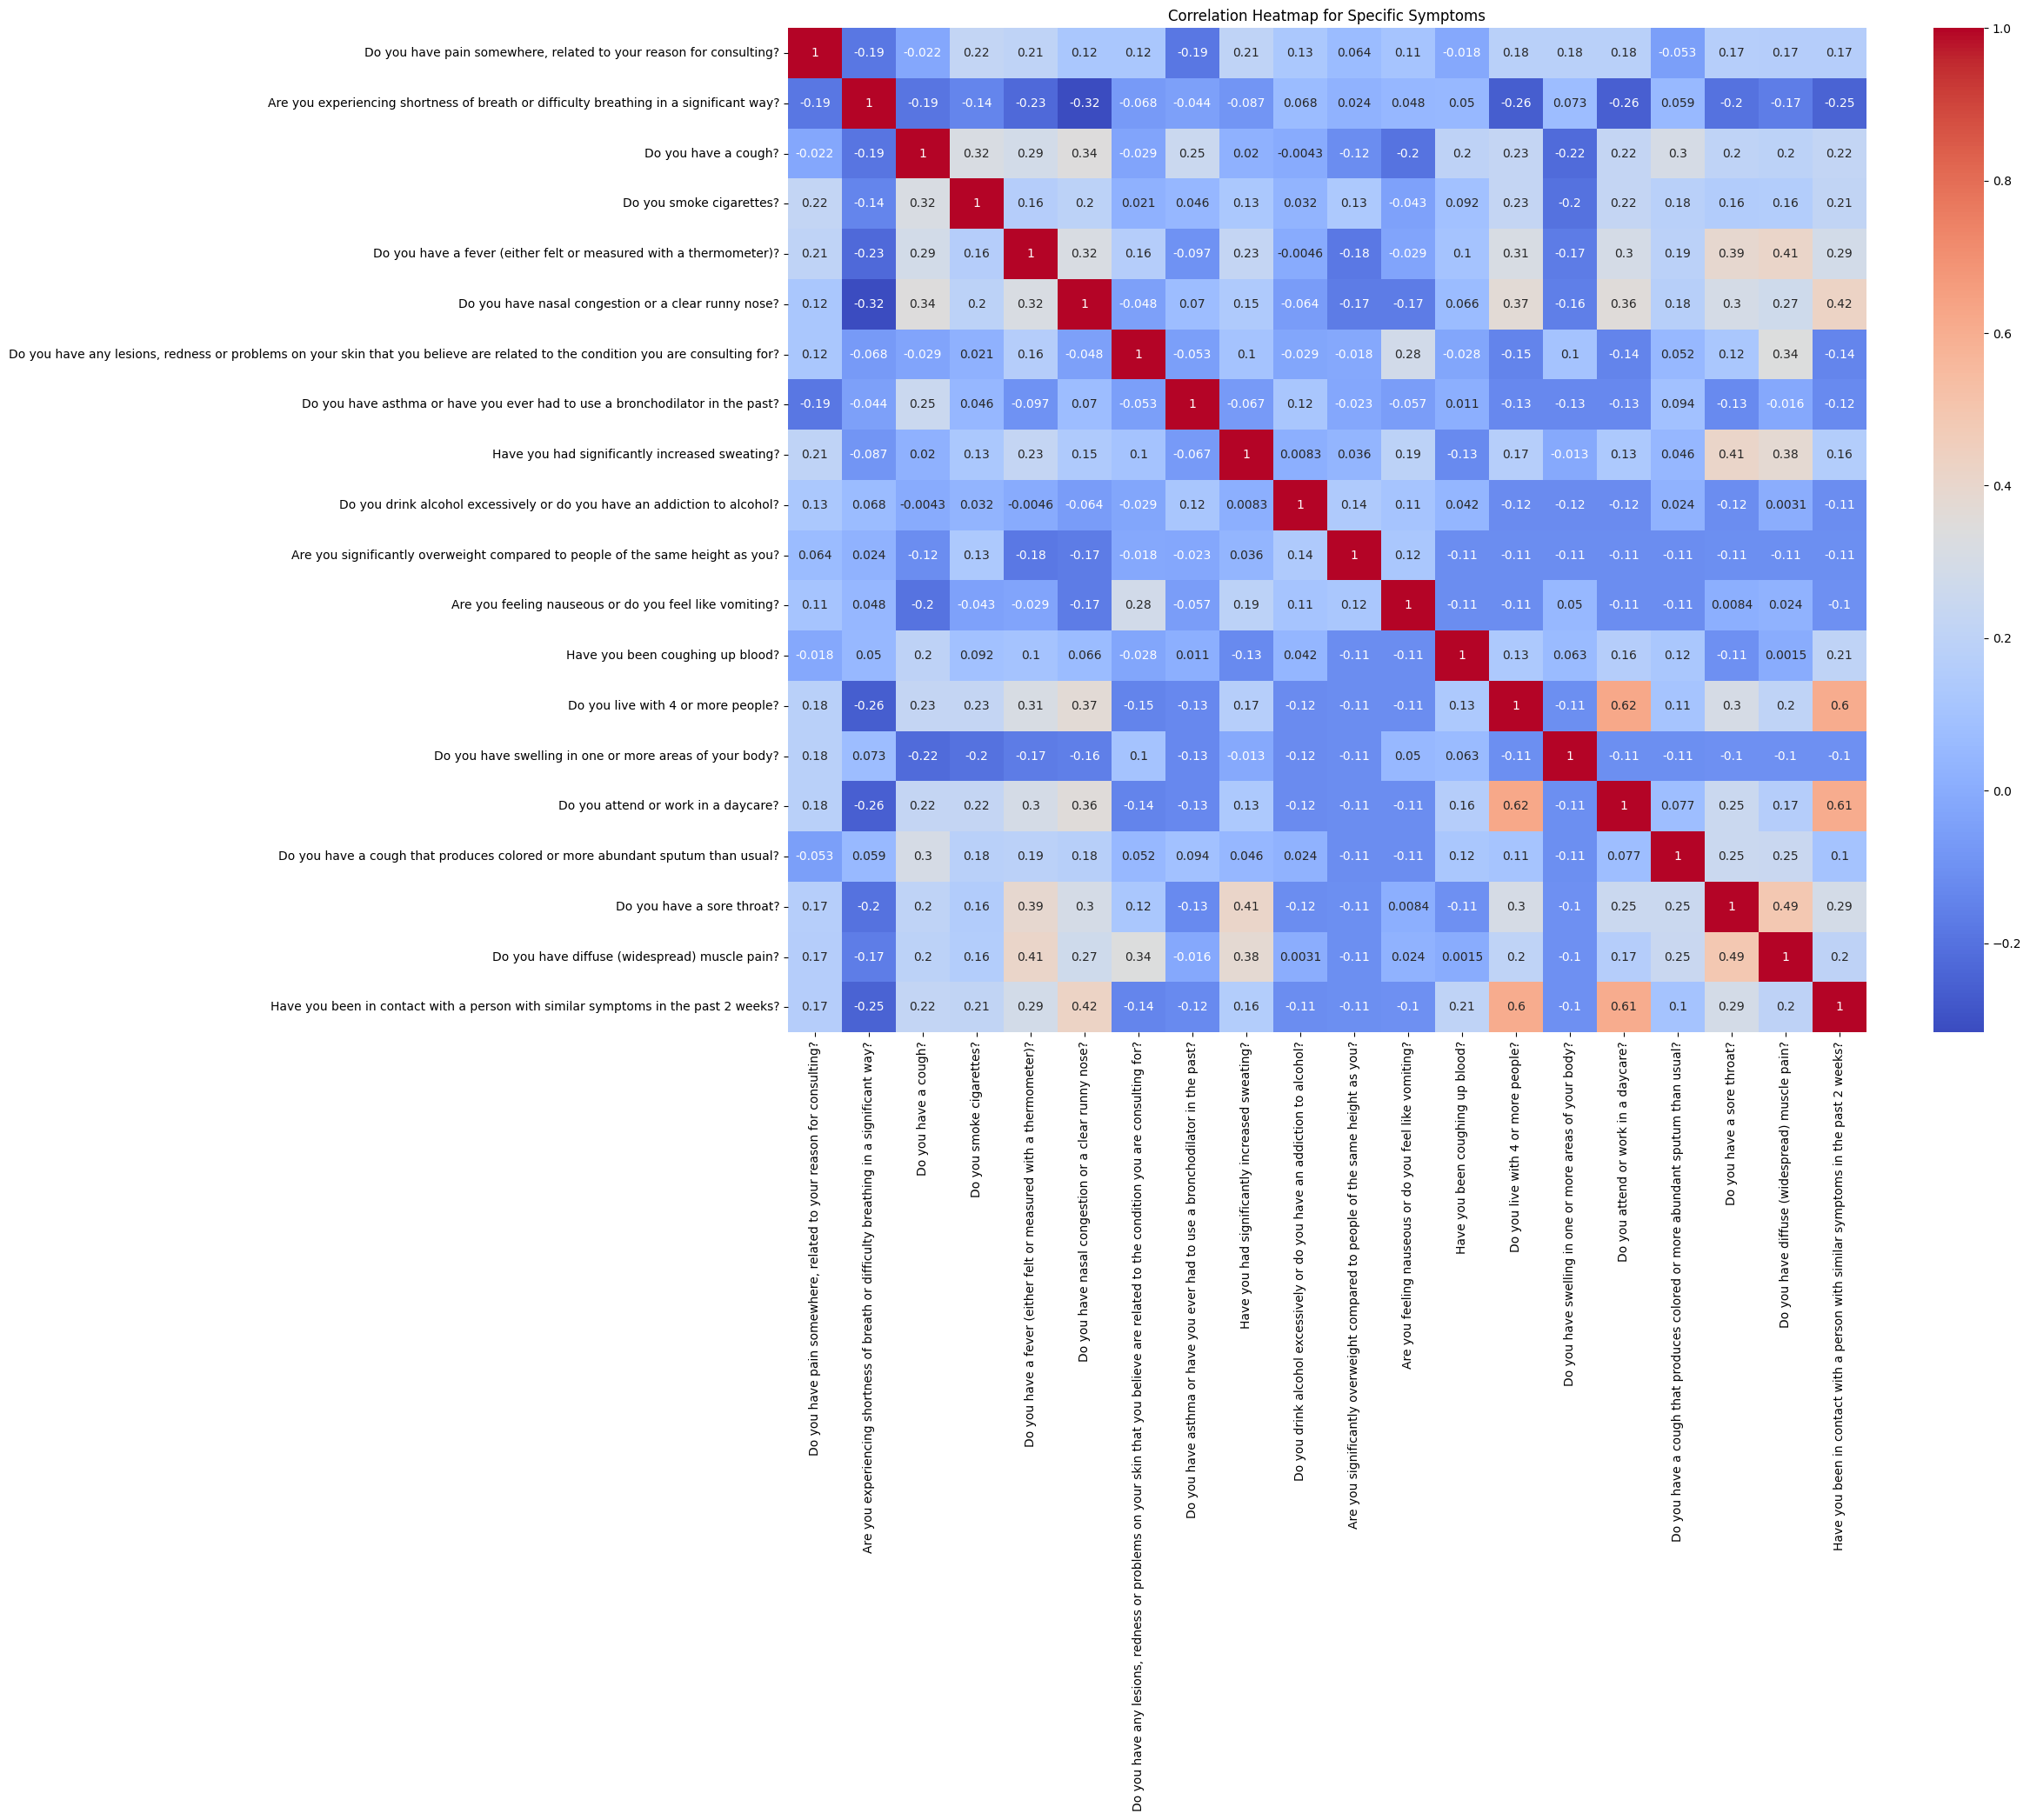

In [121]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [144]:
df

Unnamed: 0  AGE SEX                PATHOLOGY   
0                 0   18   M                     URTI  \
1                 1   21   M  HIV (initial infection)   
2                 2   19   F                Pneumonia   
3                 3   34   F                     URTI   
4                 4   36   M                     URTI   
...             ...  ...  ..                      ...   
1025597     1025597   18   M             Epiglottitis   
1025598     1025598   28   F             Epiglottitis   
1025599     1025599    0   F             Epiglottitis   
1025600     1025600   26   F             Epiglottitis   
1025601     1025601   25   F             Epiglottitis   

         Do you live with 4 or more people?   
0                                       1.0  \
1                                       0.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   
...                                     ...   
1025597                                 0.0   
1025598                                 0.0   
1025599                                 0.0   
1025600                                 0.0   
1025601                                 0.0   

         Have you had significantly increased sweating?   
0                                                   1.0  \
1                                                   1.0   
2                                                   0.0   
3                                                   0.0   
4                                                   1.0   
...                                                 ...   
1025597                                             0.0   
1025598                                             0.0   
1025599                                             0.0   
1025600                                             0.0   
1025601                                             0.0   

         Do you have pain somewhere, related to your reason for consulting?   
0                                                      1.0                   \
1                                                      1.0                    
2                                                      1.0                    
3                                                      1.0                    
4                                                      1.0                    
...                                                    ...                    
1025597                                                1.0                    
1025598                                                1.0                    
1025599                                                1.0                    
1025600                                                1.0                    
1025601                                                1.0                    

        Characterize your pain: Do you feel pain somewhere?   
0                         heavy                   temple(L)  \
1                    exhausting                   temple(L)   
2                         sharp     posterior chest wall(L)   
3                         heavy                   temple(L)   
4                         heavy                   temple(L)   
...                         ...                         ...   
1025597                   sharp                     pharynx   
1025598                   sharp                     pharynx   
1025599                   sharp                     pharynx   
1025600                   sharp                     pharynx   
1025601          a knife stroke                     trachea   

        Does the pain radiate to another location?   
0                                          nowhere  \
1                                          nowhere   
2                                          nowhere   
3                                          nowhere   
4                                          nowhere   
...                 

##### Location of pain

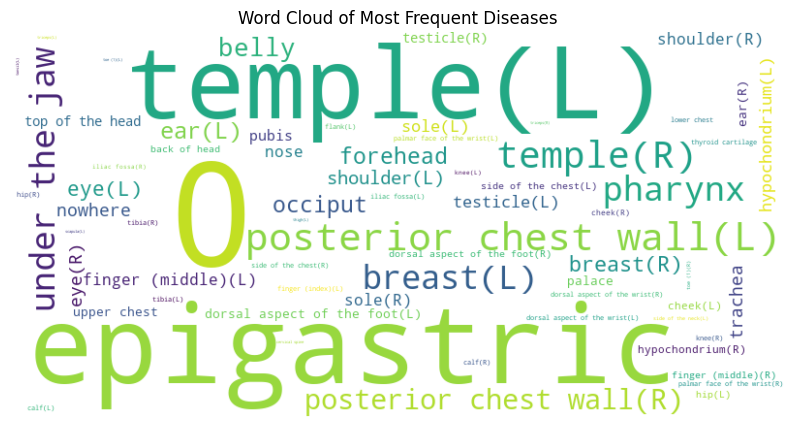

In [145]:

pain_location = df['Do you feel pain somewhere?'].value_counts().sort_values(ascending=False)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pain_location)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Diseases")
plt.show()

##### Pain levels

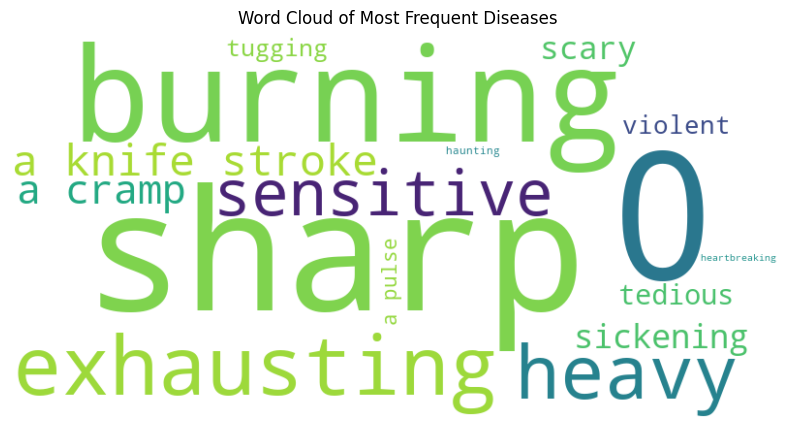

In [143]:
pain_levels = df['Characterize your pain:'].value_counts().sort_values(ascending=False)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(pain_levels)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Diseases")
plt.show()